In [ ]:
# Multi-class Classification (wheat seeds)
# https://archive-beta.ics.uci.edu/datasets?search=seeds
# import module
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.12.0


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/MULT-CLASS/seeds_dataset.csv')

In [ ]:
# return the first n rows
df.head(n=5)

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# Check nulls value
df.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [ ]:
# check the Distribution Target in Dataset
diagnosis_values = df['seedType'].value_counts()
print('categories of (diagnosis) --- \n', diagnosis_values)
print('**'*40)

categories of (diagnosis) --- 
 1    70
2    70
3    70
Name: seedType, dtype: int64
********************************************************************************


In [ ]:
# create output
df = df.drop('ID', axis=1)

In [ ]:
# return the first n rows
df.head(n=5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# split into output (Y) variables
dataset = df.values
Y = dataset[:,7].astype('float32')
print(Y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
ohe_y = np_utils.to_categorical(encoded_Y)

In [ ]:
print(ohe_y)

In [ ]:
# exclude output in data normalization
excl = df.loc[:, df.columns != 'seedType'].astype('float32')

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
excl = scaler.fit_transform(excl)

In [ ]:
print(excl)

[[0.44098198 0.50206614 0.57078075 ... 0.48610127 0.18930164 0.34515   ]
 [0.40509915 0.44628096 0.6624322  ... 0.50106895 0.03288303 0.2151649 ]
 [0.34938622 0.3471074  0.8793106  ... 0.50391996 0.251453   0.15066457]
 ...
 [0.24645889 0.2582643  0.72776794 ... 0.4290806  0.98166656 0.2644019 ]
 [0.11803591 0.16528916 0.39927435 ... 0.14682806 0.36834443 0.25849342]
 [0.16147304 0.19214869 0.54718685 ... 0.24518883 0.6334629  0.2678485 ]]


In [ ]:
# split into input (X) variables
dataset = excl
X = dataset

X_train, X_test, y_train, y_test = train_test_split(X, ohe_y, test_size=0.1, random_state=0)

In [ ]:
# create model
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(7,)),
  keras.layers.Dense(128, activation='relu', kernel_initializer='HeUniform'),
  keras.layers.Dropout(0.1),
	#keras.layers.Dense(3, activation='relu', kernel_initializer='HeUniform'),
  #keras.layers.Dropout(0.1),
  keras.layers.Dense(3, activation='softmax', kernel_initializer='GlorotUniform'),
])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 7)                 0         
                                                                 
 dense_19 (Dense)            (None, 128)               1024      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# start training
history = model.fit(X_train, y_train, epochs=500, batch_size=21, 
                    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=5,
            restore_best_weights=True
        )
    ])
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/500
9/9 [==============================] - 1s 4ms/step - loss: 1.1878 - accuracy: 0.3968
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9724 - accuracy: 0.5661
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.8908 - accuracy: 0.5820
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.6772
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7596 - accuracy: 0.7460
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.7884
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.8254
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.8571
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.8307
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.8624
Epoch 11/500
9/9 [===========

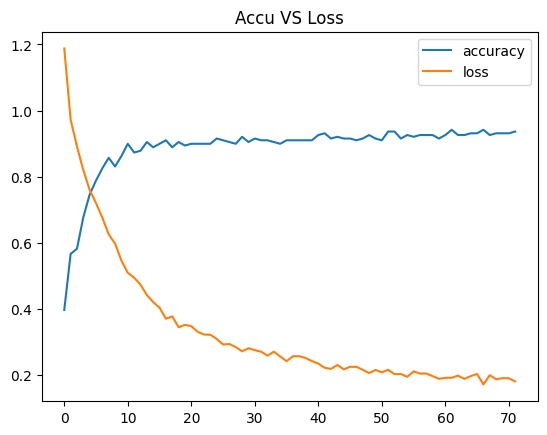

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'loss']].plot()
plt.title("Accu VS Loss")
plt.show()

1/1 [==============================] - 0s 59ms/step


<Axes: >

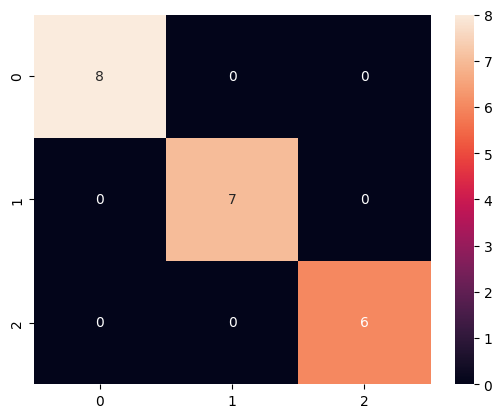

In [ ]:
# Predict on the test set and calculate confusion matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('MULT_CLASS.h5')